# Examen de Algoritmia i Complexitat (1º Parcial)

**1 (1 punto).- Demostrar que 𝑓(𝑛) + 𝑔(𝑛)𝜖Ω(min(𝑓(𝑛), 𝑔(𝑛)))**

Primero hay que demostrar que $ f(n)+g(n) \in \Omega(f(n)) $ suponiendo que $f(n)$ es el minimo. 

$ f(n)+g(n) \in \Omega(f(n)) $ 

Sabiendo de la teoria que: 

$ f(n) \in \Omega(g(n)) \implies f(n) \geqslant g(n) * k $

Podemos empezar con la formulación y demostración del problema

$f(n) + g(n) \geqslant k* f(n) \implies  \dfrac{(f(n)+g(n))}{f(n)} \geqslant k \implies 1+ \dfrac{g(n)}{f(n)} \geqslant k$

Como hemos asumido que $ min (f(x), g(x) ) $ es $f(x)$ entonces queda:

$2 \geqslant k \implies k \leqslant 2$

Por lo tanto, existe un $k$ que satisface dicha existencia. Lo mismo sería para la supocusión de $min (f(x), g(x)) = g(x)$

**2 (1punto).- Determinar la complejidad del siguiente algoritmo, donde $m$ y $n$ son dos numeros enteros positivos**

``` 
i<- 1
j<- 1
while j <= n/3 do
  if i <= m/2 then
    i<- i+1
  else 
    j <- j+1
    i <- 1
```

Lo primero que hacemos es pasarlo a python

In [ ]:
def myFunc(m,n): 
    i= 1
    j= 1
    while j <= n/3:
        if i<= m/2:
            i= i+1
        else:
            j= j+1
            i = 1
    return [i,j]

Lo segundo que hacemos, es introducir nuestra función de calculo de gráfica y tiempo: 

In [ ]:
import random
import timeit
def calculoGrafica (): 
    temps = []
    for x in range(1,10,2):
        n = x
        m = x*2 
        temps.append( (x, timeit.timeit("myFunc("+str(m)+","+ str(n)+")",
            setup="from __main__ import myFunc")))
    return temps
        

In [3]:
myFunc(5,2)

In [4]:
import matplotlib.pyplot as plt
def crear_grafica( x_list, y_list ):
    plt.scatter(x_list, y_list)
    plt.show()


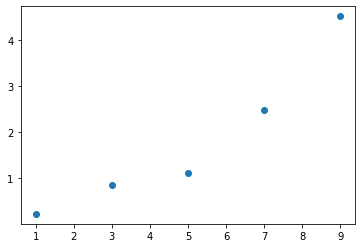

In [5]:
t = calculoGrafica()
crear_grafica(*map(list, zip(*t)))

Como se puede apreciar en el código, el peor de los casos es cuando $m/2$ es mayor que $n/2$. En este caso, se puede apreciar como la complejidad del algoritmo es $=O(m*n)$ en el caso de que m sea constante es $O(n)$ y en el mejor de los casos es $ O(1)$. Tal y como se puede apreciar en la gráfica, la complejiad es $O(m*n)$

**Problema:** Dada una secuencia de enteros, encontrar los numeros pares que existen: 

> - Ejemplo: 
> - Data la siguiente secuencia: {5,2,-1,3,6, -4}
> - El número de pares existente es. 3
  
**3 (1 punto).- Definir las pre-condiciones y post-condiciones del algoritmo que de la solución al enunciado.**

$P: A \equiv \{ a_1, a_2, a_3...a_n \} \forall a_i \in Z $

$Q: |B| \forall B \subset A \mid b_i \% 2 = 0 $

**4 (2puntos).- Proponer un algoritmo recursivo no final que provea de una solución al problema.**

In [6]:
def nPares (A):
    if not A: 
        return 0
    return int(not (A[0] % 2)) + nPares(A[1:])

In [7]:
nPares([5,2,-1,3,6,-4])

3

**5 (2puntos).- Proponer un algoritmo equivalente recursivo final que provea una solución al problema**

In [8]:
def nPares2 (A, result = 0):
    if not A: 
        return result
    return nPares2 (A[1:], result + int(not (A[0] % 2))) 

In [9]:
nPares2([5,2,-1,3,6,-4])

3

**6 (2puntos).- Proponer el algoritmo equivalente iterativo**

In [10]:
def nPares3 (A):
    result = 0
    while A: 
        result = result + int(not (A[0] % 2))
        A = A[1:]
    return result

In [11]:
nPares3([5,2,-1,3,6,-4])

3

**7 (1 punto).- Proponer la complejidad del algoritmo anterior. Es necesario dar la solución correspomdiente teniendo en cuenta el primer algoritmo (recursivo).**

Teniendo en cuenta el siguiente algoritmo: 
```python
def nPares (A):
    if not A: 
        return 0
    return int(not (A[0] % 2)) + nPares(A[1:])
```

Se puede apreciar que $T(n) = T(n-1) + O(1)$ donde n es el tamaño de la lista/Array. En este caso, $int()$ y $not()$ se consideran como coste uno al ser una transformación simple. Teniendo en cuenta estos aspectos, el coste del algoritmo es: 

$O(n)$

Además, el algoritmo recursivo final, recursivo no final e iterativo, al traterse de una misma función y transformados con la metodología correspondiente. Todos ellos tienen coste $O(n)$

Como soporte, se puede apreciar la siguiente grafica para diferentes tamaños de array: 

In [12]:
import numpy as np
from timeit import Timer
def calculoCosto ():
    temps = []
    for x in range(1,10,2): 
        arr = np.random.randint(100, size= x).tolist()
        timingFunc = Timer(lambda: nPares(arr))
        temps.append( (x, timingFunc.timeit()))
    return temps

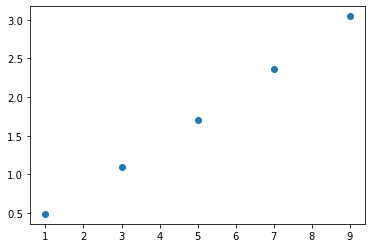

In [13]:
tint = calculoCosto()
crear_grafica(*map(list, zip(*tint)))